In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
import warnings # Supress warnings
import os
import random
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.models import load_model

In [3]:
# Seed value
SEED = 2023
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(SEED)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(SEED)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(SEED)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(SEED)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [57]:
df = pd.read_csv("./files/cycl_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
df

Rainfall  Depth_to_Groundwater  Temperature  Drainage_Volume  \
Date                                                                       
2009-01-31  0.032915              0.216100     0.068714         0.726750   
2009-02-28  0.073145              0.296982     0.074975         0.936674   
2009-03-31  0.178683              0.356360     0.236094         0.627008   
2009-04-30  0.085162              0.410094     0.413676         0.693265   
2009-05-31  0.149425              0.428197     0.647873         0.400633   
...              ...                   ...          ...              ...   
2020-02-29  0.097179              0.583554     0.225748         0.736863   
2020-03-31  0.366771              0.605731     0.255726         0.721515   
2020-04-30  0.217346              0.615560     0.421868         0.896287   
2020-05-31  0.238245              0.621753     0.606720         0.880603   
2020-06-30  0.365726              0.614845     0.701204         0.732156   

            River_Hydrometry  year  month  quarter  season     month_sin  \
Date                                                                       
2009-01-31          0.396506  2009      1        1       1  5.000000e-01   
2009-02-28          0.508567  2009      2        1       1  8.660254e-01   
2009-03-31          0.469107  2009      3        1       2  1.000000e+00   
2009-04-30          0.407926  2009      4        2       2  8.660254e-01   
2009-05-31          0.201392  2009      5        2       2  5.000000e-01   
...                      ...   ...    ...      ...     ...           ...   
2020-02-29          0.420133  2020      2        1       1  8.660254e-01   
2020-03-31          0.632459  2020      3        1       2  1.000000e+00   
2020-04-30          0.475913  2020      4        2       2  8.660254e-01   
2020-05-31          0.455494  2020      5        2       2  5.000000e-01   
2020-06-30          0.541556  2020      6        2       3  1.224647e-16   

               month_cos   quarter_sin   quarter_cos    season_sin  \
Date                                                                 
2009-01-31  8.660254e-01  1.000000e+00  6.123234e-17  1.000000e+00   
2009-02-28  5.000000e-01  1.000000e+00  6.123234e-17  1.000000e+00   
2009-03-31  6.123234e-17  1.000000e+00  6.123234e-17  1.224647e-16   
2009-04-30 -5.000000e-01  1.224647e-16 -1.000000e+00  1.224647e-16   
2009-05-31 -8.660254e-01  1.224647e-16 -1.000000e+00  1.224647e-16   
...                  ...           ...           ...           ...   
2020-02-29  5.000000e-01  1.000000e+00  6.123234e-17  1.000000e+00   
2020-03-31  6.123234e-17  1.000000e+00  6.123234e-17  1.224647e-16   
2020-04-30 -5.000000e-01  1.224647e-16 -1.000000e+00  1.224647e-16   
2020-05-31 -8.660254e-01  1.224647e-16 -1.000000e+00  1.224647e-16   
2020-06-30 -1.000000e+00  1.224647e-16 -1.000000e+00 -1.000000e+00   

              season_cos  
Date                      
2009-01-31  6.123234e-17  
2009-02-28  6.123234e-17  
2009-03-31 -1.000000e+00  
2009-04-30 -1.000000e+00  
2009-05-31 -1.000000e+00  
...                  ...  
2020-02-29  6.123234e-17  
2020-03-31 -1.000000e+00  
2020-04-30 -1.000000e+00  
2020-05-31 -1.000000e+00  
2020-06-30 -1.836970e-16  

[138 rows x 15 columns]

In [58]:
features_cos = ['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'day_cos', 'month_cos', 'week_of_year_cos', 'quarter_cos', 'season_cos']
delete2 = [feature for feature in df.columns if feature not in features_cos]

In [59]:
df_cos = df.drop(delete2, axis=1)

In [60]:
df_cos

Rainfall  Depth_to_Groundwater  Temperature  Drainage_Volume  \
Date                                                                       
2009-01-31  0.032915              0.216100     0.068714         0.726750   
2009-02-28  0.073145              0.296982     0.074975         0.936674   
2009-03-31  0.178683              0.356360     0.236094         0.627008   
2009-04-30  0.085162              0.410094     0.413676         0.693265   
2009-05-31  0.149425              0.428197     0.647873         0.400633   
...              ...                   ...          ...              ...   
2020-02-29  0.097179              0.583554     0.225748         0.736863   
2020-03-31  0.366771              0.605731     0.255726         0.721515   
2020-04-30  0.217346              0.615560     0.421868         0.896287   
2020-05-31  0.238245              0.621753     0.606720         0.880603   
2020-06-30  0.365726              0.614845     0.701204         0.732156   

            River_Hydrometry     month_cos   quarter_cos    season_cos  
Date                                                                    
2009-01-31          0.396506  8.660254e-01  6.123234e-17  6.123234e-17  
2009-02-28          0.508567  5.000000e-01  6.123234e-17  6.123234e-17  
2009-03-31          0.469107  6.123234e-17  6.123234e-17 -1.000000e+00  
2009-04-30          0.407926 -5.000000e-01 -1.000000e+00 -1.000000e+00  
2009-05-31          0.201392 -8.660254e-01 -1.000000e+00 -1.000000e+00  
...                      ...           ...           ...           ...  
2020-02-29          0.420133  5.000000e-01  6.123234e-17  6.123234e-17  
2020-03-31          0.632459  6.123234e-17  6.123234e-17 -1.000000e+00  
2020-04-30          0.475913 -5.000000e-01 -1.000000e+00 -1.000000e+00  
2020-05-31          0.455494 -8.660254e-01 -1.000000e+00 -1.000000e+00  
2020-06-30          0.541556 -1.000000e+00 -1.000000e+00 -1.836970e-16  

[138 rows x 8 columns]

In [61]:
features_new = ['Depth_to_Groundwater', 'Drainage_Volume', 'River_Hydrometry', 'month_cos', 'week_of_year_cos', 'quarter_cos']
features_3 = ['Rainfall', 'Depth_to_Groundwater', 'Drainage_Volume', 'River_Hydrometry', 'month_cos', 'quarter_cos']
delete3 = [feature for feature in df_cos.columns if feature not in features_3]
df_new = df_cos.drop(delete3, axis=1)

In [62]:
df = df_new
df

Rainfall  Depth_to_Groundwater  Drainage_Volume  River_Hydrometry  \
Date                                                                            
2009-01-31  0.032915              0.216100         0.726750          0.396506   
2009-02-28  0.073145              0.296982         0.936674          0.508567   
2009-03-31  0.178683              0.356360         0.627008          0.469107   
2009-04-30  0.085162              0.410094         0.693265          0.407926   
2009-05-31  0.149425              0.428197         0.400633          0.201392   
...              ...                   ...              ...               ...   
2020-02-29  0.097179              0.583554         0.736863          0.420133   
2020-03-31  0.366771              0.605731         0.721515          0.632459   
2020-04-30  0.217346              0.615560         0.896287          0.475913   
2020-05-31  0.238245              0.621753         0.880603          0.455494   
2020-06-30  0.365726              0.614845         0.732156          0.541556   

               month_cos   quarter_cos  
Date                                    
2009-01-31  8.660254e-01  6.123234e-17  
2009-02-28  5.000000e-01  6.123234e-17  
2009-03-31  6.123234e-17  6.123234e-17  
2009-04-30 -5.000000e-01 -1.000000e+00  
2009-05-31 -8.660254e-01 -1.000000e+00  
...                  ...           ...  
2020-02-29  5.000000e-01  6.123234e-17  
2020-03-31  6.123234e-17  6.123234e-17  
2020-04-30 -5.000000e-01 -1.000000e+00  
2020-05-31 -8.660254e-01 -1.000000e+00  
2020-06-30 -1.000000e+00 -1.000000e+00  

[138 rows x 6 columns]

In [63]:
N_FEATURES  = 6 # multivariate
N_STEPS_IN  = 3 # static window
N_STEPS_OUT = 1  # single-step
TRAIN_SIZE = int((len(df.index)-N_STEPS_IN) * 0.5)
VAL_SIZE = int((len(df.index)-N_STEPS_IN) * 0.2)
#print(TRAIN_SIZE, VAL_SIZE)

In [65]:
def df_to_X_y(df):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-N_STEPS_IN):
        row = [r for r in df_as_np[i:i+N_STEPS_IN]]
        X.append(row)
        label = df_as_np[i+N_STEPS_IN][1]
        y.append(label)
    return np.array(X), np.array(y)

In [66]:
X1, y1=df_to_X_y(df)
X1.shape, y1.shape

((135, 3, 6), (135,))

In [67]:
def get_sets(df):
    X1, y1 = df_to_X_y(df)
    X_train1, y_train1 = X1[:TRAIN_SIZE], y1[:TRAIN_SIZE]
    X_val1, y_val1 = X1[TRAIN_SIZE:TRAIN_SIZE + VAL_SIZE], y1[TRAIN_SIZE:TRAIN_SIZE + VAL_SIZE]
    X_test1, y_test1 = X1[TRAIN_SIZE + VAL_SIZE:], y1[TRAIN_SIZE + VAL_SIZE:]
    return X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1

In [68]:
X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = get_sets(df)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((67, 3, 6), (67,), (27, 3, 6), (27,), (41, 3, 6), (41,))

In [69]:
def init_model(rnn_units = 64, rnn_units_sec = 64):
    # Use initializers to initialize model parameters with the same values
    INITIALIZER_GLOROT_UNIFORM = tf.keras.initializers.GlorotUniform(seed = SEED)
    INITIALIZER_ORTHOGONAL = tf.keras.initializers.Orthogonal(gain = 1.0, seed = SEED)
    model = Sequential()
    model.add(InputLayer((N_STEPS_IN, N_FEATURES)))
    # model.add(rnn(units                 = rnn_units,
    #                kernel_initializer    = INITIALIZER_GLOROT_UNIFORM,
    #                recurrent_initializer = INITIALIZER_ORTHOGONAL,
    #                return_sequences=True))
    model.add(SimpleRNN(units                 = rnn_units_sec,
                   kernel_initializer    = INITIALIZER_GLOROT_UNIFORM,
                   recurrent_initializer = INITIALIZER_ORTHOGONAL))
    tf.keras.layers.Dropout(0.1),
    model.add(Dense(units= 8, activation='relu', kernel_initializer = INITIALIZER_GLOROT_UNIFORM))
    model.add(Dense(units              = N_STEPS_OUT,
                    kernel_initializer = INITIALIZER_GLOROT_UNIFORM,
                    activation = 'linear'))
    model.summary()
    return model

In [70]:
# Create model instance
model = init_model()

# Visualize model architecture
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4544      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________


In [71]:
def train_model(df, checkpoint):
    X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = get_sets(df)
    model = init_model()
    cp = ModelCheckpoint('C:\\Users\\poeppelmann\\DataspellProjects\\dsProject\\rnn_models\\multi\\'+checkpoint, save_best_only=True)
    model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=[RootMeanSquaredError()])
    model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp])
    return model

In [72]:
def model_predict(df, checkpoint):
    model = load_model('C:\\Users\\poeppelmann\\DataspellProjects\\dsProject\\rnn_models\\multi\\'+checkpoint)
    X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = get_sets(df)
    #train_predictions = model.predict(X_train1).flatten()
    #val_predictions = model.predict(X_val1).flatten()
    #predictions = np.concatenate((train_predictions, val_predictions, test_predictions))
    #results = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y1}, index=df.index[5:])
    #results.to_csv('predictions/'+name)
    predictions = pd.Series(model.predict(X_test1).flatten())
    predictions.index = df.index[TRAIN_SIZE+VAL_SIZE+N_STEPS_IN:]
    predictions.name='Depth_to_Groundwater'
    return predictions

In [73]:
checkpoint = '6'

In [74]:
train_model(df, checkpoint)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4544      
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1/3 [=========>....................] - ETA: 4s - loss: 0.4278 - root_mean_squared_error: 0.6541

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 7s 2s/step - loss: 0.2926 - root_mean_squared_error: 0.5409 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 2/30
3/3 [==============================] - 0s 15ms/step - loss: 0.0350 - root_mean_squared_error: 0.1871 - val_loss: 0.1460 - val_root_mean_squared_error: 0.3821
Epoch 3/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0767 - root_mean_squared_error: 0.2770 - val_loss: 0.1668 - val_root_mean_squared_error: 0.4084
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0677 - root_mean_squared_error: 0.2603 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345
Epoch 5/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0314 - root_mean_squared_error: 0.1772

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 4s 2s/step - loss: 0.0245 - root_mean_squared_error: 0.1566 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 6/30
3/3 [==============================] - 0s 23ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 7/30
3/3 [==============================] - 0s 22ms/step - loss: 0.0288 - root_mean_squared_error: 0.1698 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 8/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1834

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 5s 3s/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1032
Epoch 9/30
3/3 [==============================] - 0s 27ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1288
Epoch 10/30
3/3 [==============================] - 0s 25ms/step - loss: 0.0113 - root_mean_squared_error: 0.1065 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1841
Epoch 11/30
3/3 [==============================] - 0s 23ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1812
Epoch 12/30
3/3 [==============================] - 0s 21ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1216
Epoch 13/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0866

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 4s 2s/step - loss: 0.0074 - root_mean_squared_error: 0.0860 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 14/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0984

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 3s 2s/step - loss: 0.0084 - root_mean_squared_error: 0.0916 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 15/30
3/3 [==============================] - 0s 17ms/step - loss: 0.0096 - root_mean_squared_error: 0.0980 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 16/30
3/3 [==============================] - 0s 31ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 17/30
3/3 [==============================] - 0s 25ms/step - loss: 0.0070 - root_mean_squared_error: 0.0839 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1343
Epoch 18/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0079 - root_mean_squared_error: 0.0891 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1022
Epoch 19/30
3/3 [==============================] - 0s 23ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0070 - val_root_mean_squared_error: 0

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 4s 2s/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0671
Epoch 24/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0729

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multi\6\assets


3/3 [==============================] - 4s 2s/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0635
Epoch 25/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.0639 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878
Epoch 26/30
3/3 [==============================] - 0s 22ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0980
Epoch 27/30
3/3 [==============================] - 0s 20ms/step - loss: 0.0037 - root_mean_squared_error: 0.0607 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0851
Epoch 28/30
3/3 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0769
Epoch 29/30
3/3 [==============================] - 0s 30ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0061 - val_root_mean_squared_error: 0

In [75]:
result = model_predict(df, checkpoint)

2/2 [==============================] - 0s 4ms/step


In [76]:
result

Date
2017-02-28    0.778930
2017-03-31    0.733450
2017-04-30    0.809455
2017-05-31    0.788302
2017-06-30    0.776058
2017-07-31    0.638840
2017-08-31    0.599307
2017-09-30    0.492074
2017-10-31    0.582312
2017-11-30    0.529906
2017-12-31    0.446807
2018-01-31    0.607023
2018-02-28    0.562536
2018-03-31    0.630758
2018-04-30    0.743395
2018-05-31    0.656408
2018-06-30    0.781519
2018-07-31    0.706114
2018-08-31    0.602237
2018-09-30    0.587548
2018-10-31    0.580571
2018-11-30    0.645786
2018-12-31    0.604504
2019-01-31    0.648983
2019-02-28    0.627214
2019-03-31    0.600646
2019-04-30    0.616372
2019-05-31    0.686856
2019-06-30    0.692175
2019-07-31    0.521889
2019-08-31    0.623781
2019-09-30    0.525410
2019-10-31    0.514902
2019-11-30    0.513877
2019-12-31    0.587702
2020-01-31    0.609753
2020-02-29    0.602034
2020-03-31    0.563914
2020-04-30    0.701831
2020-05-31    0.663592
2020-06-30    0.698258
Name: Depth_to_Groundwater, dtype: float32

In [77]:
result.to_csv('predictions/RNN_multi/'+checkpoint+'.csv')

In [78]:
metrics = {}
def calc_metrics(name, series):

    results = pd.DataFrame(data={'Predictions':series, 'Actuals':df[name]}, index=series.index)

    # Step 2: Calculate the differences between the predicted and actual values
    results['Difference'] = results['Actuals'] - results['Predictions']

    # Step 3: Calculate squared differences for RMSE
    results['Squared_difference'] = results['Difference'] ** 2

    # Step 4: Calculate absolute differences for MAE and MAPE
    results['Absolute_difference'] = np.abs(results['Difference'])
    results['Absolute_percentage_difference'] = np.abs(results['Difference'] / results['Actuals'])

    # Step 5: Compute the metrics
    rmse = np.sqrt(results['Squared_difference'].mean())
    mae = results['Absolute_difference'].mean()
    mape = results['Absolute_percentage_difference'].mean() * 100  # to get the percentage
    return rmse, mae, mape

column = 'Depth_to_Groundwater'
rmse, mae, mape = calc_metrics(column, result)
metrics[column] = {
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('metrics/RNN_multi/'+checkpoint+'.csv')
metrics_df

Depth_to_Groundwater
MAE               0.067485
MAPE             12.290295
RMSE              0.079008

<Axes: xlabel='Date'>

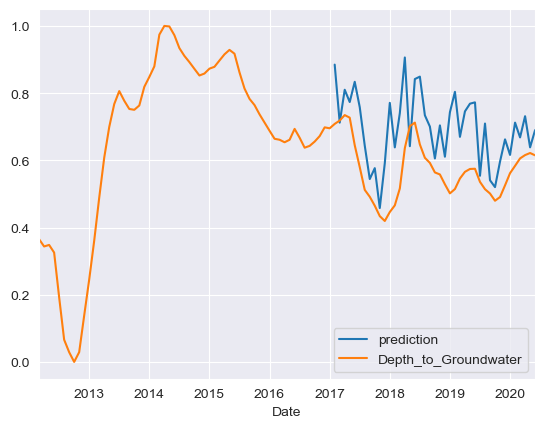

In [412]:
result[-100:].plot(legend=True, label='prediction')
df['Depth_to_Groundwater'][-100:].plot(legend=True)

In [79]:
import winsound
winsound.Beep(2500,1000)

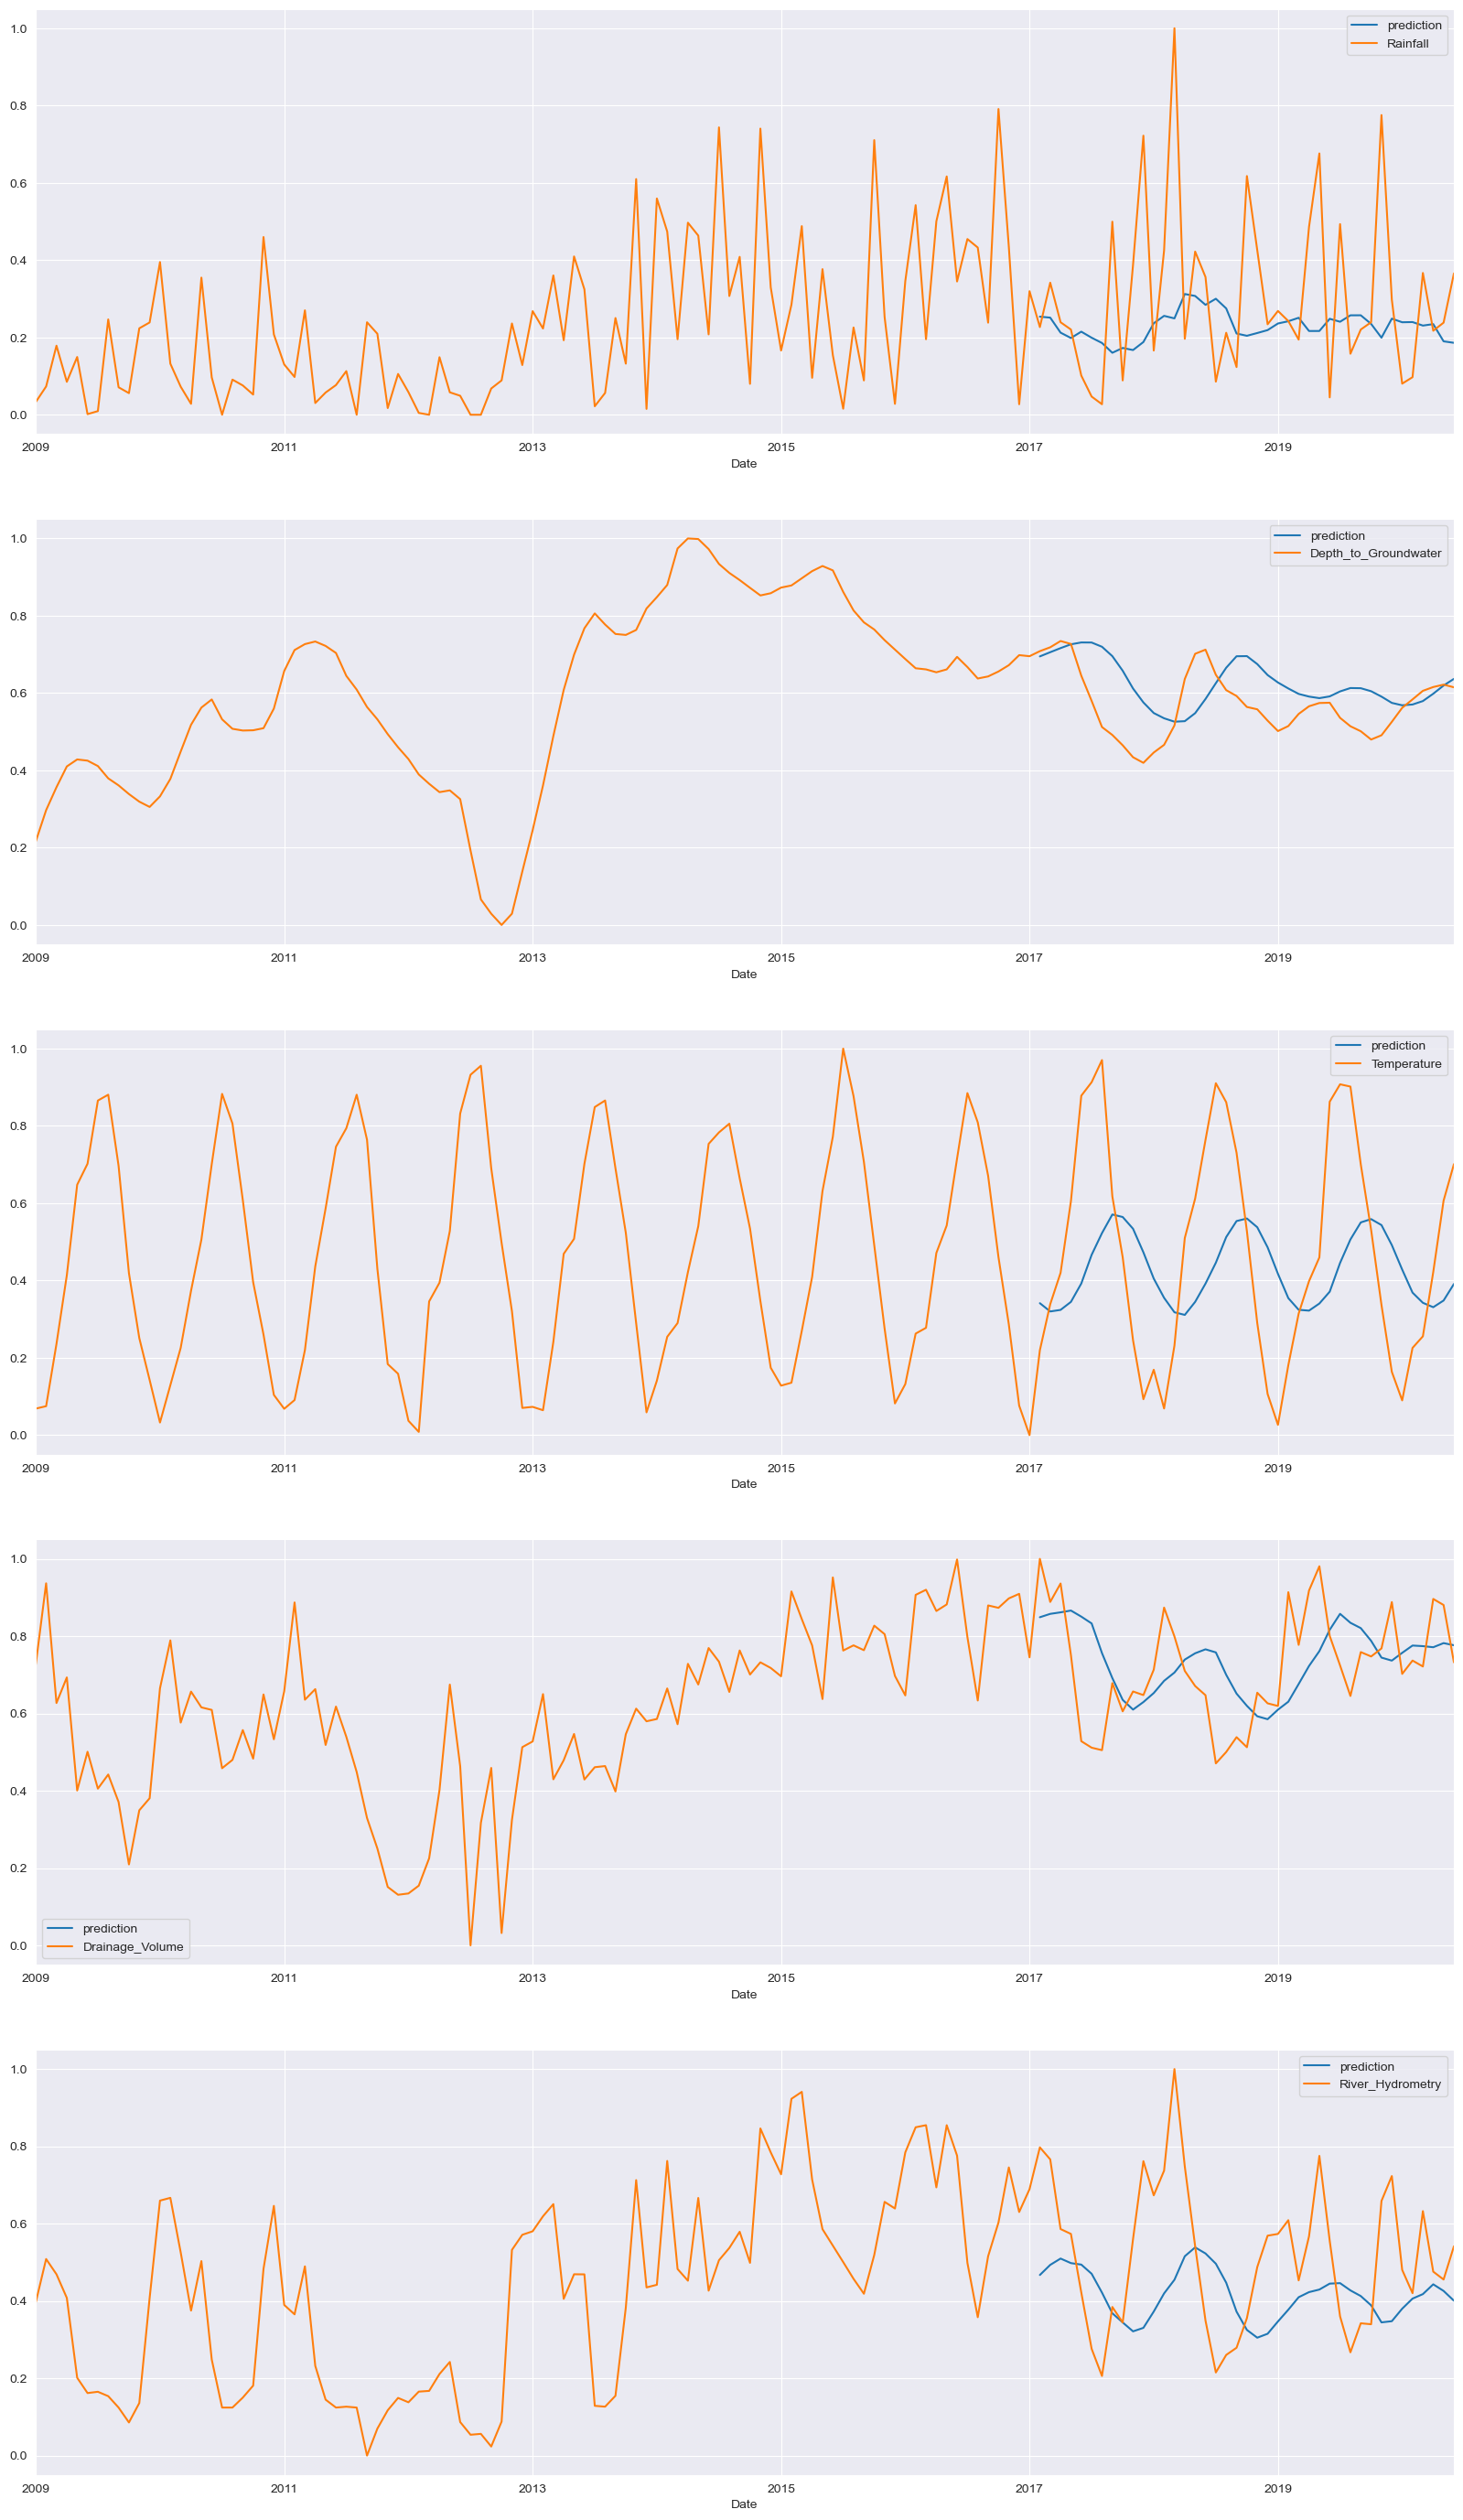

In [196]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 35))
for i in range(5):
    saved_df.iloc[-1000:,i].plot(ax = ax[i], label='prediction', legend=True)
    df.iloc[-1000:,i].plot(ax = ax[i], legend=True)
plt.show()